In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("../processed/dataset_limpio.csv")

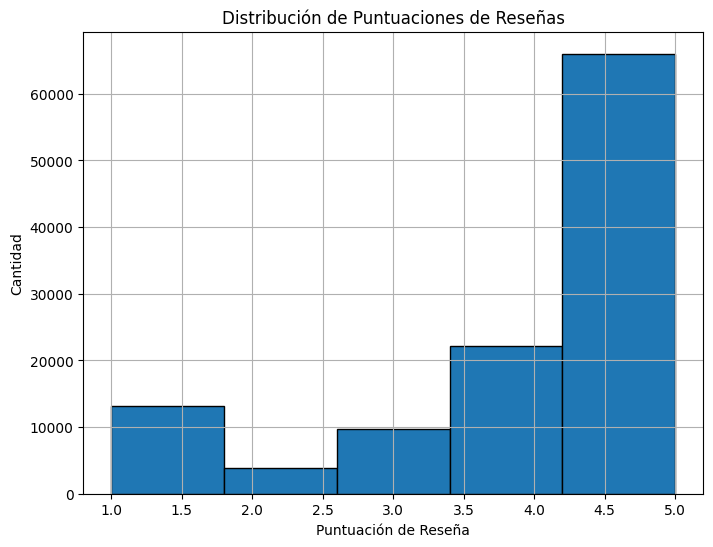

In [4]:
# Distribución de las puntuaciones de reseñas
plt.figure(figsize=(8,6))
plt.hist(df['review_score'], bins=5, edgecolor='black')
plt.title('Distribución de Puntuaciones de Reseñas')
plt.xlabel('Puntuación de Reseña')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

In [8]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

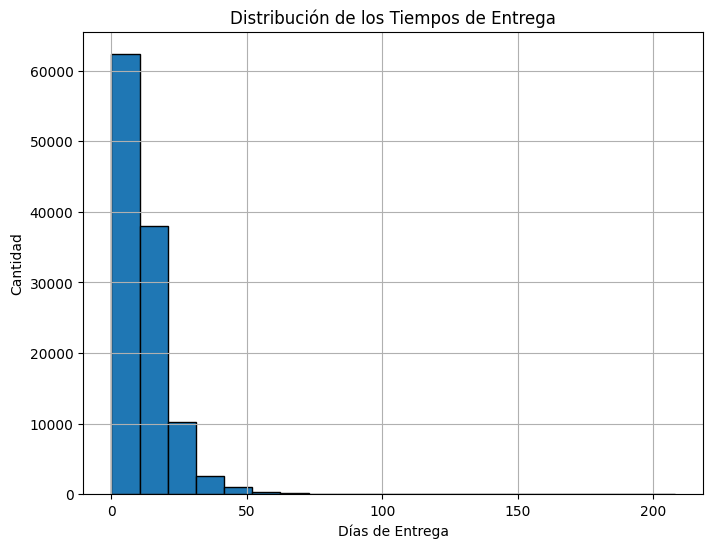

In [9]:
# Distribución de los tiempos de entrega
plt.figure(figsize=(8,6))
plt.hist(df['delivery_time_days'], bins=20, edgecolor='black')
plt.title('Distribución de los Tiempos de Entrega')
plt.xlabel('Días de Entrega')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

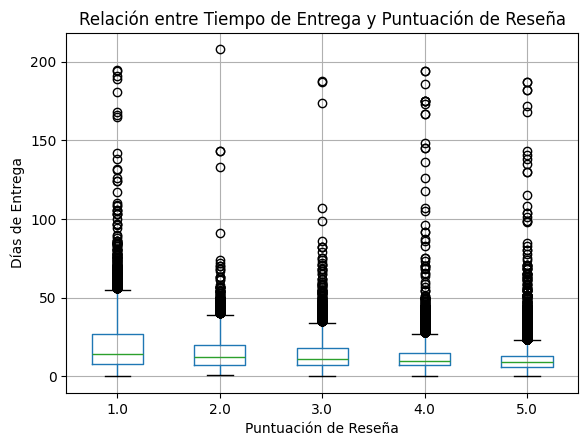

In [10]:
# Boxplot entre tiempo de entrega y puntuación de reseña
plt.figure(figsize=(8,6))
df.boxplot(column='delivery_time_days', by='review_score', grid=True)
plt.title('Relación entre Tiempo de Entrega y Puntuación de Reseña')
plt.suptitle('')
plt.xlabel('Puntuación de Reseña')
plt.ylabel('Días de Entrega')
plt.show()

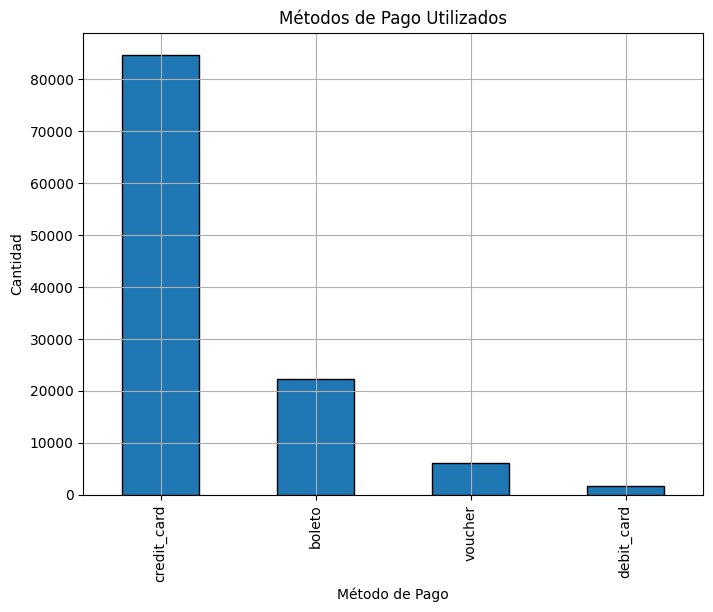

In [11]:
# Conteo de métodos de pago
payment_counts = df['payment_type'].value_counts()

plt.figure(figsize=(8,6))
payment_counts.plot(kind='bar', edgecolor='black')
plt.title('Métodos de Pago Utilizados')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

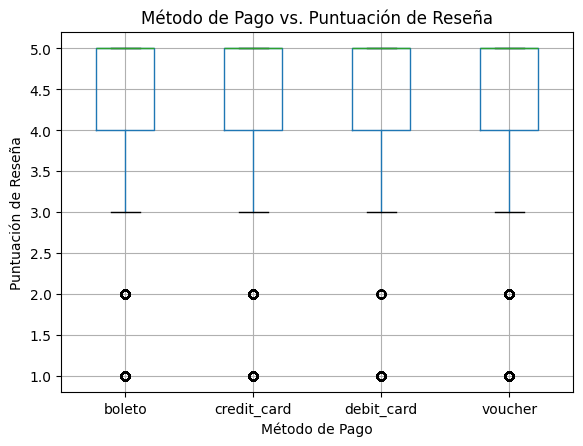

In [12]:
# Boxplot entre método de pago y puntuación de reseña
plt.figure(figsize=(8,6))
df.boxplot(column='review_score', by='payment_type', grid=True)
plt.title('Método de Pago vs. Puntuación de Reseña')
plt.suptitle('')  # Eliminar título secundario
plt.xlabel('Método de Pago')
plt.ylabel('Puntuación de Reseña')
plt.show()

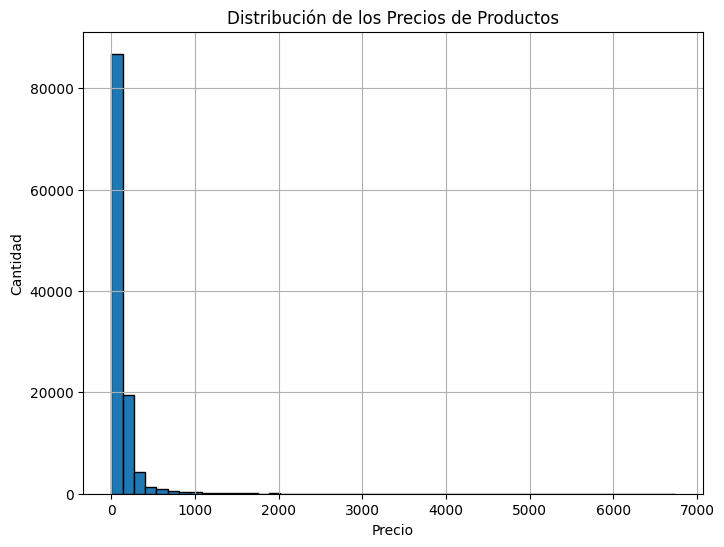

In [13]:
# Distribución de precios
plt.figure(figsize=(8,6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Distribución de los Precios de Productos')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

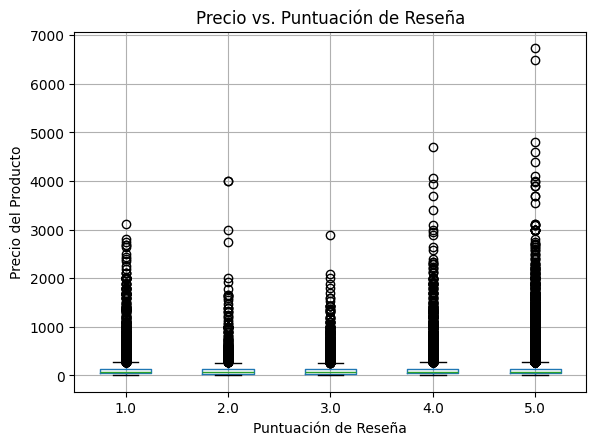

In [14]:
# Boxplot entre precio y puntuación de reseña
plt.figure(figsize=(8,6))
df.boxplot(column='price', by='review_score', grid=True)
plt.title('Precio vs. Puntuación de Reseña')
plt.suptitle('')  # Eliminar título secundario
plt.xlabel('Puntuación de Reseña')
plt.ylabel('Precio del Producto')
plt.show()

In [16]:
df['customer_purchase_frequency'] = df.groupby('customer_unique_id')['order_id'].transform('count')

<Figure size 800x600 with 0 Axes>

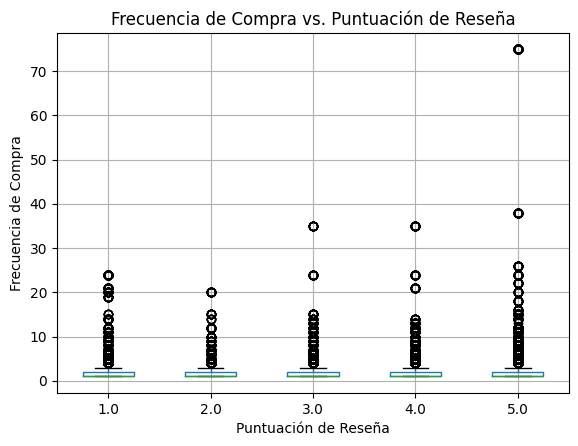

In [17]:
# Boxplot entre frecuencia de compra y puntuación de reseña
plt.figure(figsize=(8,6))
df.boxplot(column='customer_purchase_frequency', by='review_score', grid=True)
plt.title('Frecuencia de Compra vs. Puntuación de Reseña')
plt.suptitle('')  # Eliminar título secundario
plt.xlabel('Puntuación de Reseña')
plt.ylabel('Frecuencia de Compra')
plt.show()

In [18]:
df.to_csv('../processed/dataset_con_caracteristicas.csv', index=False)